# Pymaceuticals Inc.
---

### Analysis

- After analyzing the information from Pymaceuticals, Inc. obtained from most recent animal study of different cancer drugs tested in mice, the conclusion was:
    -  The treatments that have the best results are Capomulin and Ramique, since the size of the tumor is smaller compared to the other two treatments. This afirmation can be found on the Box plot visualization for the distribution of the tumor volume for each treatment.
    -  In the Box plot visualization we can also notice that Infubinol has outliers, the red point is outside of the whiskers, this means that the data is not stable.
    -  The capomulin treatment in the first 20 days did not have very good results since there is an increase in the size of the tumor up to 48 and but after day 20 it drops drastically to 4 and keeps decreasing, this means that the treatment has a good result close to the half of the treatment. The results can be corroborated on the Line plot for tumor volume vs. time point for a single mouse treated (Capomulin treatment of moust 1509). Take in consideration this results are only for one mice.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata)

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice = df["Mouse ID"].nunique()
mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID = df.loc[df.duplicated(subset=['Mouse ID','Timepoint',]),'Mouse ID'].unique()
duplicate_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_ID_df = df.loc[df["Mouse ID"] == "g989", :]
duplicate_ID_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_cleaned = df.loc[df["Mouse ID"] != "g989"]
df_cleaned.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# # Checking the number of mice in the clean DataFrame.
mice = df_cleaned["Mouse ID"].nunique()
mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_reg_mean = df_cleaned.groupby('Drug Regimen').mean(numeric_only=True)["Tumor Volume (mm3)"]
drug_reg_med = df_cleaned.groupby('Drug Regimen').median(numeric_only=True)["Tumor Volume (mm3)"]
drug_reg_var = df_cleaned.groupby('Drug Regimen').var(numeric_only=True)["Tumor Volume (mm3)"]
drug_reg_stdev = df_cleaned.groupby('Drug Regimen').std(numeric_only=True)["Tumor Volume (mm3)"]
drug_reg_sem = df_cleaned.groupby('Drug Regimen').sem(numeric_only=True)["Tumor Volume (mm3)"]

# # Create each grouping of mean, median, variance, std dev, and std error for each drug name to be pulled in to a dataframe

summary_statistics_pd = pd.DataFrame({"Mean Tumor Volume": drug_reg_mean,
                                      "Median Tumor Volume": drug_reg_med,
                                      "Tumor Volume Variance": drug_reg_var,
                                      "Tumor Volume Std. Dev.": drug_reg_stdev,
                                      "Tumor Volume Std. Err.": drug_reg_sem})
summary_statistics_pd

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.
# Group by the Drug Regimen.
# Used help from the Xpert Learning Assistant

drug_regimen = df_cleaned.groupby("Drug Regimen")

# Calculate mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_statistics = drug_regimen["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

# Rename columns
summary_statistics.columns = ["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."]

# Display the summary statistics DataFrame
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

drug_regimen = df_cleaned.groupby("Drug Regimen")
summary_statistical = drug_regimen["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_statistical

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

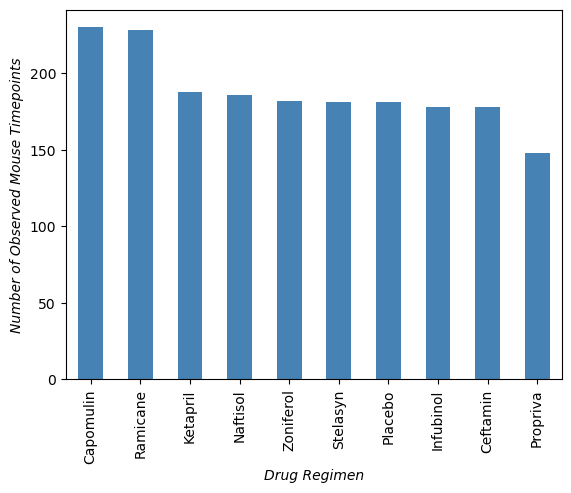

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas. 

mice_count = df_cleaned["Drug Regimen"].value_counts()
plot_pandas = mice_count.plot.bar(color = 'steelblue')

plt.xlabel("Drug Regimen",fontsize=10, fontstyle="italic")
plt.ylabel("Number of Observed Mouse Timepoints", fontsize=10, fontstyle="italic")

plt.show()

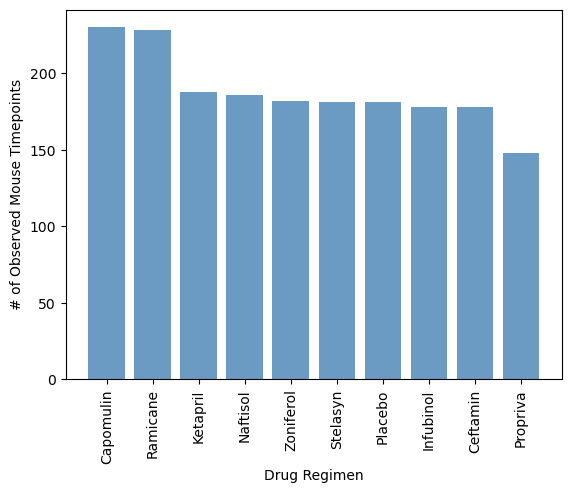

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color = 'steelblue', alpha = 0.8, align = 'center')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = "vertical");

<Axes: ylabel='count'>

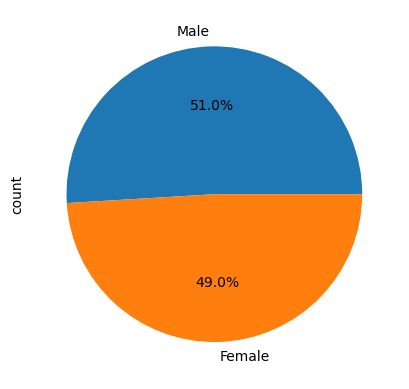

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Obtain the number of each sex and then plotting as a pie chart
data_by_sex = df_cleaned["Sex"].value_counts()
data_by_sex.plot.pie(autopct = "%1.1f%%")

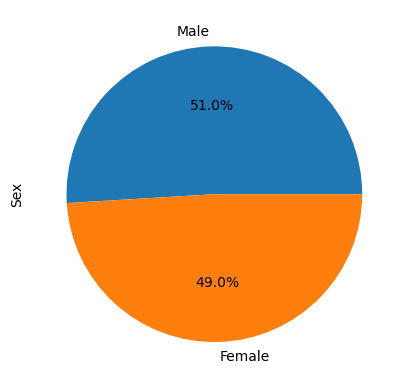

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Set the labels, add the size of the pie chart
labels = ['Female', 'Male']
sizes = [49.0, 51.0]

plot = data_by_sex.plot.pie(y = 'Total Count', autopct = "%1.1f%%")
plt.ylabel('Sex');

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Start by getting the last (greatest) timepoint for each mouse
mouse_greatest_timepoint = df_cleaned.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(mouse_greatest_timepoint, df_cleaned, on=['Mouse ID', 'Timepoint'], how='inner')
final_tumor_volume.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
5,a401,45,66.794156,4,Zoniferol,Female,8,25
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
8,a457,10,49.783419,0,Ketapril,Female,11,30
9,a492,45,60.122011,1,Stelasyn,Male,20,25


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    final_tumor_vol = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_volume_data.append(final_tumor_vol)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. Formula for IQR
    quartiles = final_tumor_vol.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # # Determine outliers using upper and lower bounds
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")
    
    # add subset 



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


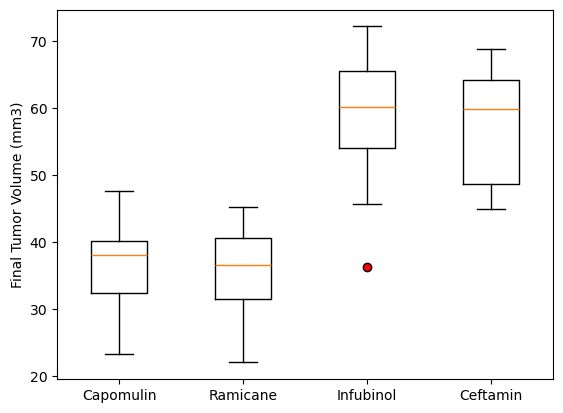

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# This calculation is with the cleaned DataFrame
fig, ax = plt.subplots()

# Format and labels
red_dot = dict(markerfacecolor = "red")
ax.boxplot(tumor_volume_data, labels = treatments, flierprops = red_dot)
ax.set_ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

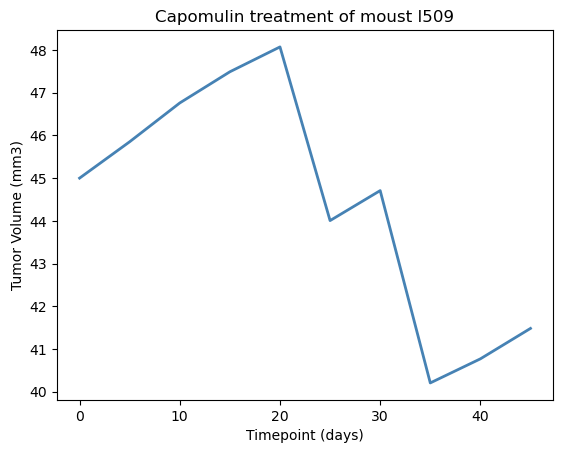

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = df_cleaned.loc[df_cleaned["Drug Regimen"] == "Capomulin",:] 
line = capomulin.loc[capomulin["Mouse ID"] == "l509",:]

line.head()

x_axis = line["Timepoint"]
tumor_size = line["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()

# Format and labels

plt.title('Capomulin treatment of moust l509')
plt.plot(x_axis, tumor_size, linewidth = 2, color = "steelblue", label = "Fahreneit")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


In [18]:
capomulin.groupby(['Mouse ID']).mean(numeric_only=True)[["Tumor Volume (mm3)", "Weight (g)"]]


,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22.0
b742,40.083699,21.0
f966,36.505973,17.0
g288,41.990097,19.0
g316,44.613344,22.0
i557,44.805810,24.0
i738,39.141053,20.0
j119,44.465236,23.0
j246,43.216925,21.0


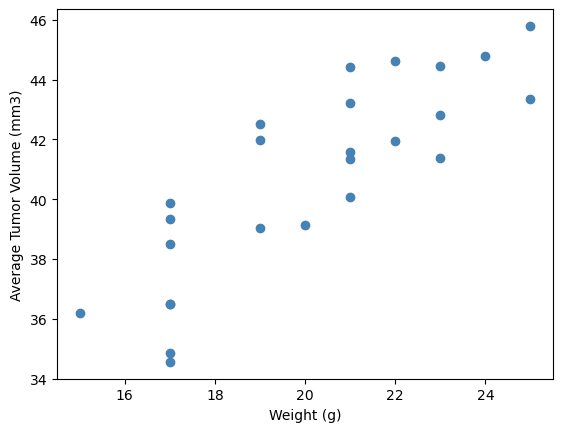

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# I belive the weight make more sence on the x
capomulin_weight_tumor_df = capomulin.groupby("Mouse ID").mean(numeric_only=True)[["Tumor Volume (mm3)", "Weight (g)"]]

#Format
plt.scatter(capomulin_weight_tumor_df["Weight (g)"], capomulin_weight_tumor_df["Tumor Volume (mm3)"], color = "steelblue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
marker_size = 15
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


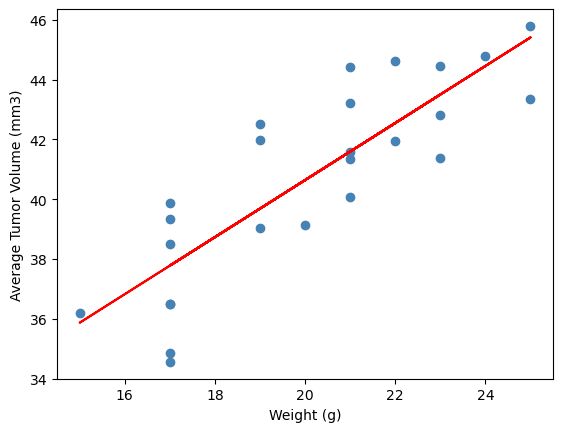

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen, 
# pearsonr = Pearson Correlation Test Between Two Variables, {round, 2} = round to two decimals
# slope = s, intercept=i, rvalue=r, pvalue=p, stderr=se

# Correlation
correlation_weight_tumor_df = st.pearsonr(capomulin_weight_tumor_df['Weight (g)'], capomulin_weight_tumor_df['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_weight_tumor_df[0], 2)}")

# Linear regression model
(s, i, r, p, se) = st.linregress(capomulin_weight_tumor_df["Weight (g)"], capomulin_weight_tumor_df["Tumor Volume (mm3)"])
line_values = capomulin_weight_tumor_df["Weight (g)"] * s + i

# Customization
plt.scatter(capomulin_weight_tumor_df["Weight (g)"], capomulin_weight_tumor_df["Tumor Volume (mm3)"], color = 'steelblue')
plt.plot(capomulin_weight_tumor_df["Weight (g)"], line_values, color = 'red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()